# TPC Hits

<script src="https://cdn.jsdelivr.net/gh/plexoos/pub-docs@0be43f5/assets/ipynb.js"></script>
 
<a id="toggle_all_input" href="#" data-show-input="false" onclick="toggleAllInput(this); return false;">Show/Hide input</a> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import uproot

In [2]:
idx = pd.IndexSlice

def plot_hits(df1, df2=None):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    axs = ax.ravel()#[i] if type(ax) is np.ndarray else ax
    
    a = axs[0] 
    a.plot(df1.x, df1.y, '.', ms=1)
    a.plot(df2.x, df2.y, '.', ms=1, c='C1') if df2 is not None else None
    a.set_xlabel('x, cm')
    a.set_ylabel('y, cm')
    a.grid(True)    
        
    a = axs[1] 
    a.plot(df1.z, np.sqrt(df1.x**2 + df1.y**2), '.', ms=1)
    a.plot(df2.z, np.sqrt(df2.x**2 + df2.y**2), '.', ms=1, c='C1') if df2 is not None else None
    a.set_xlabel('z, cm')
    a.set_ylabel('r, cm')
    a.grid(True)    

    plt.tight_layout()
    plt.show()

## Plot STAR hits

In [3]:
rfile = uproot.open("/Users/dsmirnov/work/sphenix/star-tpc-data/star_tpc_hits_Y17_AuAu54.root")
df_star = rfile['t'].pandas.df()
df_star.rename(columns={'hits.x': 'x', 'hits.y': 'y', 'hits.z': 'z', 'hits': 'n'}, inplace=True)
#df_star

### Event 1

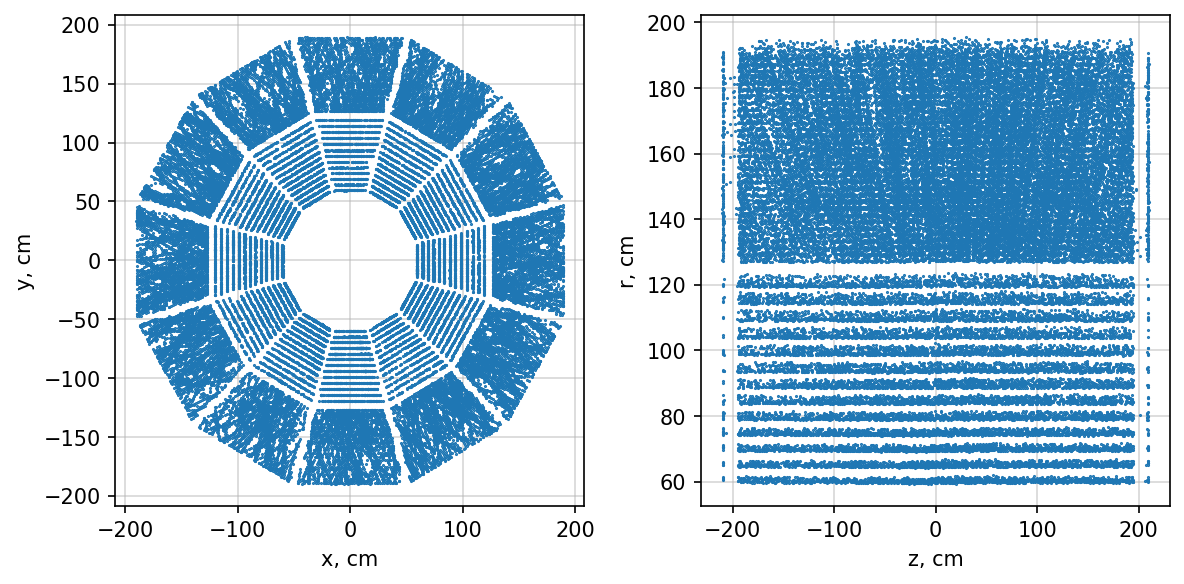

In [4]:
plot_hits(df_star.loc[idx[1]])

### Event 3

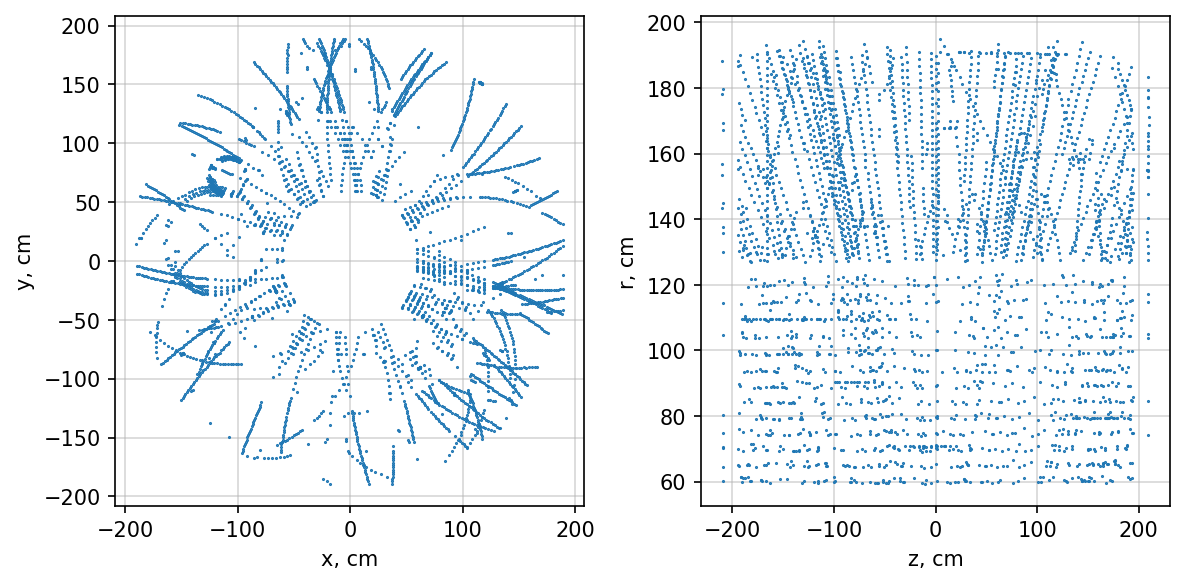

In [5]:
plot_hits(df_star.loc[idx[3]])

## Plot sPHENIX hits

In [6]:
rfile = uproot.open("/Users/dsmirnov/work/sphenix/star-tpc-data/sphenix_tpc_hits.root")
df_sphen = rfile['t'].pandas.df()
df_sphen.rename(columns={'hits.x': 'x', 'hits.y': 'y', 'hits.z': 'z', 'hits': 'n'}, inplace=True)
#df_sphen

### Event 1

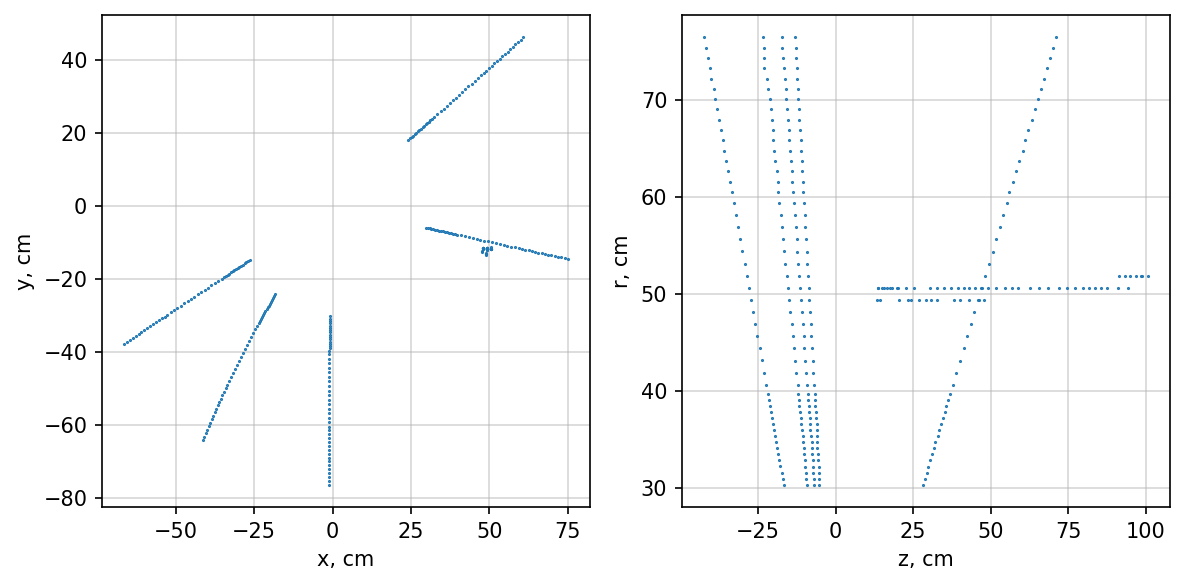

In [7]:
plot_hits(df_sphen.loc[idx[1]])

### Event 2

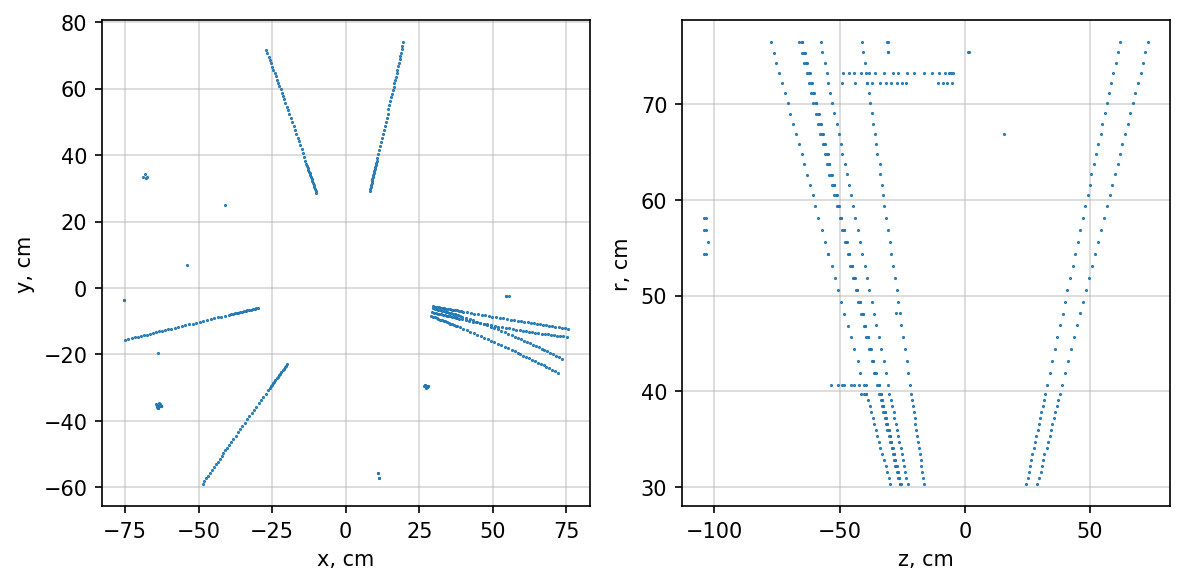

In [8]:
plot_hits(df_sphen.loc[idx[2]])

## Overlay STAR and sPHENIX hits

In [9]:
df1 = df_star.loc[idx[3]]
df2 = df_sphen.loc[idx[2]]

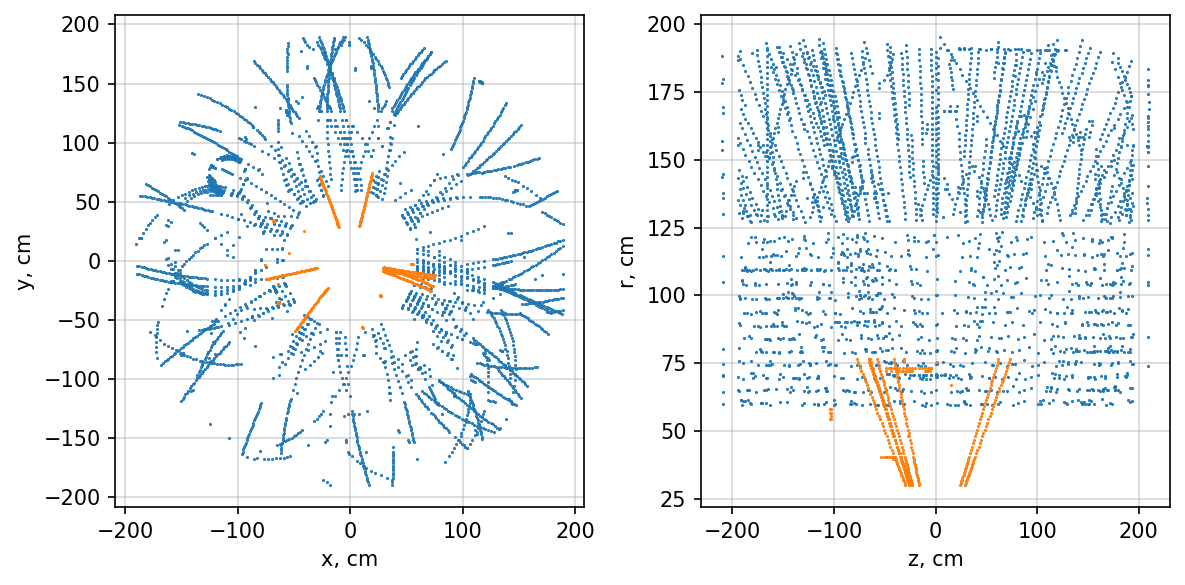

In [10]:
plot_hits(df1, df2)